In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import keras
from matplotlib.image import imread
import random

In [2]:
data_dir = 'E:\Programming\ML\Datasets\Flowers\Splitted\\'

In [3]:
os.listdir(data_dir)

['test', 'train', 'val']

In [4]:
os.getcwd()

'C:\\Users\\Mohamed'

In [5]:
train_path = data_dir + '\\train\\'
valid_path = data_dir + '\\val\\'
test_path  = data_dir + 'test\\'

In [6]:
os.listdir(train_path)

['astilbe',
 'bellflower',
 'black_eyed_susan',
 'calendula',
 'california_poppy',
 'carnation',
 'common_daisy',
 'coreopsis',
 'daffodil',
 'dandelion',
 'iris',
 'magnolia',
 'output',
 'rose',
 'sunflower',
 'tulip',
 'water_lily']

In [7]:
os.getcwd()

'C:\\Users\\Mohamed'

In [8]:
os.chdir('E:\Programming\ML\Datasets\Flowers\Splitted')

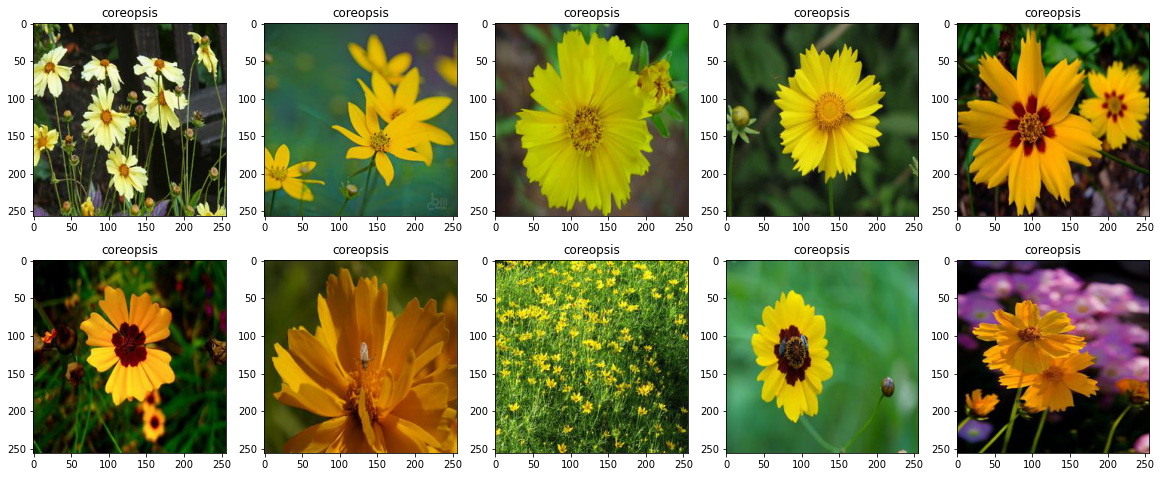

In [9]:
test_folder  = r'E:\Programming\ML\Datasets\Flowers\Splitted\test'

plt.figure(figsize=(20 , 8))
for i in range (5):
    
    subfolder = random.choice(os.listdir(test_folder))
    
    flower_name = os.path.join(test_folder , subfolder)
    
    for i in range (10):
    
        file = random.choice(os.listdir(flower_name))
        
        image_path = os.path.join(flower_name , file)

        img = imread(image_path)

        ax = plt.subplot(2 , 5 , i+1)

        ax.title.set_text(subfolder)

        plt.imshow(img)

In [10]:
test_path

'E:\\Programming\\ML\\Datasets\\Flowers\\Splitted\\test\\'

In [11]:
dim1 = []
dim2 = []

flower = random.choice(os.listdir(test_path)) 

for image_filename in os.listdir(test_path + flower):
    
    img = imread(test_path + flower +'\\'+ image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    
print(flower)
np.mean(dim1) , np.mean(dim2)

tulip


(256.0, 256.0)

In [12]:
image_shape = (256, 256 , 3)

In [13]:
flower = random.choice(os.listdir(test_path)) 
flower


'coreopsis'

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [100]:
train_gen = ImageDataGenerator( rescale=1/255.0,
                                rotation_range=20,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                channel_shift_range=0.2,
                                fill_mode='nearest',
                                horizontal_flip=True)


valid_gen = ImageDataGenerator(rescale=1/255.0)

test_gen = ImageDataGenerator(rescale=1/255.0)


In [101]:
train_image_gen = train_gen.flow_from_directory(train_path,
                                               target_size=(256,256),
                                               shuffle= True)

Found 12586 images belonging to 17 classes.


In [102]:
valid_image_gen = valid_gen.flow_from_directory(valid_path,
                                               target_size=(256,256),
                                               shuffle= False)

Found 1567 images belonging to 17 classes.


In [103]:
test_image_gen = test_gen.flow_from_directory(test_path,
                                               target_size=(256,256),
                                               shuffle= False)

Found 1587 images belonging to 17 classes.


In [104]:
train_image_gen.class_indices

{'astilbe': 0,
 'bellflower': 1,
 'black_eyed_susan': 2,
 'calendula': 3,
 'california_poppy': 4,
 'carnation': 5,
 'common_daisy': 6,
 'coreopsis': 7,
 'daffodil': 8,
 'dandelion': 9,
 'iris': 10,
 'magnolia': 11,
 'output': 12,
 'rose': 13,
 'sunflower': 14,
 'tulip': 15,
 'water_lily': 16}

In [44]:
len(os.listdir(test_path))

17

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early_stop = EarlyStopping(monitor= 'val_loss' , patience=2)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , Flatten , MaxPooling2D , Dropout

In [48]:
model = Sequential()

model.add(Conv2D(filters=32 , kernel_size=(3,3) , input_shape = image_shape , activation= 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(filters=64 , kernel_size=(3,3) , activation= 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))


model.add(Conv2D(filters=64 , kernel_size=(3,3) , activation= 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))


model.add(Conv2D(filters=32 , kernel_size=(3,3) , activation= 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))


model.add(Flatten())


model.add(Dense(64 , activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128 , activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64 , activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(17 , activation='softmax'))




model.compile(optimizer=tf.keras.optimizers.Adam() , loss=  tf.keras.losses.categorical_crossentropy,
             metrics='accuracy')

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 62, 62, 64)       

In [51]:
model.fit_generator(train_image_gen , validation_data= valid_image_gen , epochs= 10 , callbacks=[early_stop])

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_14684\3642182039.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_image_gen , validation_data= valid_image_gen , epochs= 10 , callbacks=[early_stop])


Epoch 1/10
394/394 [==============================] - 307s 777ms/step - loss: 2.5231 - accuracy: 0.1288 - val_loss: 2.1239 - val_accuracy: 0.2368
Epoch 2/10
394/394 [==============================] - 325s 824ms/step - loss: 2.1193 - accuracy: 0.2314 - val_loss: 1.8829 - val_accuracy: 0.3516
Epoch 3/10
394/394 [==============================] - 323s 819ms/step - loss: 1.9493 - accuracy: 0.2944 - val_loss: 1.8646 - val_accuracy: 0.3472
Epoch 4/10
394/394 [==============================] - 313s 794ms/step - loss: 1.8521 - accuracy: 0.3436 - val_loss: 1.7289 - val_accuracy: 0.3542
Epoch 5/10
394/394 [==============================] - 328s 833ms/step - loss: 1.7837 - accuracy: 0.3692 - val_loss: 1.7327 - val_accuracy: 0.4205
Epoch 6/10
394/394 [==============================] - 312s 790ms/step - loss: 1.7330 - accuracy: 0.3918 - val_loss: 1.6729 - val_accuracy: 0.4257
Epoch 7/10
394/394 [==============================] - 304s 772ms/step - loss: 1.6686 - accuracy: 0.4160 - val_loss: 1.5815 -

In [105]:
train_gen = ImageDataGenerator(#preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                                rescale=1/255.0,
                                rotation_range=20,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                channel_shift_range=0.2,
                                fill_mode='nearest',
                                horizontal_flip=True)


valid_gen = ImageDataGenerator(rescale=1/255.0)

test_gen = ImageDataGenerator(rescale=1/255.0)


In [106]:
train_image_gen = train_gen.flow_from_directory(train_path,
                                               target_size=(256,256),
                                               shuffle= True)

Found 12586 images belonging to 17 classes.


In [107]:
valid_image_gen = valid_gen.flow_from_directory(valid_path,
                                               target_size=(256,256),
                                               shuffle= False)

Found 1567 images belonging to 17 classes.


In [108]:
test_image_gen = test_gen.flow_from_directory(test_path,
                                               target_size=(256,256),
                                               shuffle= False)

Found 1587 images belonging to 17 classes.


In [109]:
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

efficientnet_url = 'https://tfhub.dev/google/efficientnet/b0/feature-vector/1'

In [110]:
import tensorflow_hub as hub
from tensorflow.keras import layers

In [111]:
def create_model(model_url, num_classes=10):

    feature_extractor_layer = hub.KerasLayer(model_url,
                                       trainable=False, 
                                       name='feature_extraction_layer',
                                       input_shape=image_shape) 

    
    model = tf.keras.Sequential([
    feature_extractor_layer, 
    layers.Dense(num_classes, activation='softmax', name='output_layer')      
    ])

    return model

In [97]:
resnet_model = create_model(resnet_url, num_classes=train_image_gen.num_classes)


resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [77]:
resnet_history = resnet_model.fit(train_image_gen,
                                  epochs=5,
                                  steps_per_epoch=len(train_image_gen),
                                  validation_data=valid_image_gen,
                                  validation_steps=len(valid_image_gen))

Epoch 1/5
394/394 [==============================] - 325s 806ms/step - loss: 0.8565 - accuracy: 0.7535 - val_loss: 0.4656 - val_accuracy: 0.8615
Epoch 2/5
394/394 [==============================] - 336s 853ms/step - loss: 0.4432 - accuracy: 0.8644 - val_loss: 0.3782 - val_accuracy: 0.8883
Epoch 3/5
394/394 [==============================] - 322s 817ms/step - loss: 0.3684 - accuracy: 0.8848 - val_loss: 0.3426 - val_accuracy: 0.8902
Epoch 4/5
394/394 [==============================] - 319s 808ms/step - loss: 0.3143 - accuracy: 0.9027 - val_loss: 0.3233 - val_accuracy: 0.8966
Epoch 5/5
394/394 [==============================] - 357s 905ms/step - loss: 0.2909 - accuracy: 0.9056 - val_loss: 0.3262 - val_accuracy: 0.8979


<AxesSubplot:>

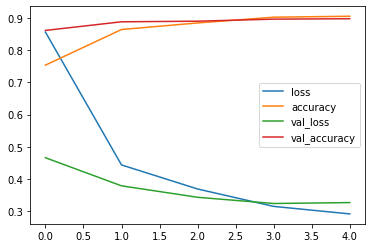

In [83]:
resnet_metrics = pd.DataFrame(resnet_history.history)
resnet_metrics.plot()

(<AxesSubplot:>, <AxesSubplot:>)

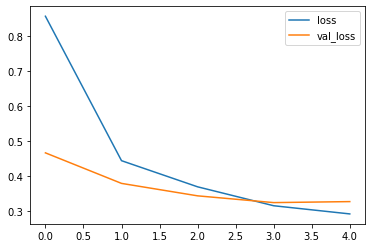

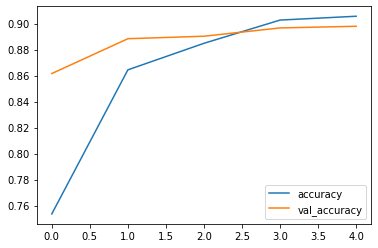

In [85]:
resnet_metrics[['loss', 'val_loss']].plot() , resnet_metrics[['accuracy', 'val_accuracy']].plot()

In [88]:
efficientnet_model = create_model(efficientnet_url, num_classes=train_image_gen.num_classes)


efficientnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [89]:
efficientnet_history = efficient_model.fit(train_image_gen,
                                  epochs=5,
                                  steps_per_epoch=len(train_image_gen),
                                  validation_data=valid_image_gen,
                                  validation_steps=len(valid_image_gen))

Epoch 1/5
394/394 [==============================] - 336s 832ms/step - loss: 0.8496 - accuracy: 0.7895 - val_loss: 0.3815 - val_accuracy: 0.9017
Epoch 2/5
394/394 [==============================] - 343s 871ms/step - loss: 0.3680 - accuracy: 0.9039 - val_loss: 0.2937 - val_accuracy: 0.9164
Epoch 3/5
394/394 [==============================] - 325s 825ms/step - loss: 0.2831 - accuracy: 0.9234 - val_loss: 0.2472 - val_accuracy: 0.9349
Epoch 4/5
394/394 [==============================] - 327s 828ms/step - loss: 0.2454 - accuracy: 0.9325 - val_loss: 0.2311 - val_accuracy: 0.9324
Epoch 5/5
394/394 [==============================] - 323s 818ms/step - loss: 0.2094 - accuracy: 0.9426 - val_loss: 0.2246 - val_accuracy: 0.9368


(<AxesSubplot:>, <AxesSubplot:>)

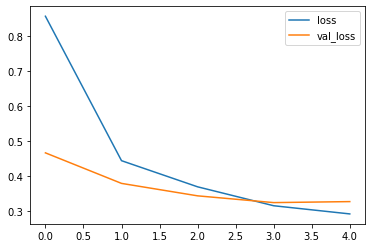

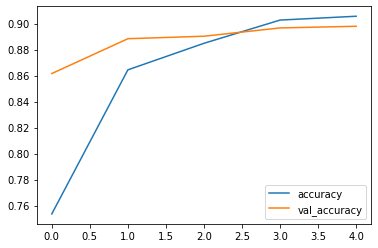

In [90]:
efficientnet_metrics = pd.DataFrame(resnet_history.history)
efficientnet_metrics[['loss', 'val_loss']].plot() , efficientnet_metrics[['accuracy', 'val_accuracy']].plot()

In [114]:
mobilenet_url = 'https://tfhub.dev/google/imagenet/mobilenet_v1_100_160/feature_vector/5'

In [115]:
mobilenet_model = create_model(model_url= mobilenet_url,
                               num_classes= train_image_gen.num_classes)


mobilenet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [116]:
mobilenet_history = mobilenet_model.fit(train_image_gen,
                                  epochs=5,
                                  steps_per_epoch=len(train_image_gen),
                                  validation_data=valid_image_gen,
                                  validation_steps=len(valid_image_gen))

Epoch 1/5
394/394 [==============================] - 346s 867ms/step - loss: 0.7959 - accuracy: 0.7819 - val_loss: 0.3345 - val_accuracy: 0.9049
Epoch 2/5
394/394 [==============================] - 316s 801ms/step - loss: 0.3366 - accuracy: 0.9065 - val_loss: 0.2446 - val_accuracy: 0.9298
Epoch 3/5
394/394 [==============================] - 316s 802ms/step - loss: 0.2615 - accuracy: 0.9235 - val_loss: 0.2164 - val_accuracy: 0.9400
Epoch 4/5
394/394 [==============================] - 305s 773ms/step - loss: 0.2263 - accuracy: 0.9341 - val_loss: 0.1835 - val_accuracy: 0.9470
Epoch 5/5
394/394 [==============================] - 308s 780ms/step - loss: 0.1982 - accuracy: 0.9411 - val_loss: 0.1803 - val_accuracy: 0.9534


In [117]:
mobilenet_model.evaluate(test_image_gen)

50/50 [==============================] - 18s 369ms/step - loss: 0.2478 - accuracy: 0.9275


[0.24781297147274017, 0.9275362491607666]

In [119]:
mobilenet_model.metrics_names

['loss', 'accuracy']